<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Objective


1. Provide the best performing model to determine probability for a patient having a heart disease or attack
2. Providing the most important drivers for a heart disease or attack.

#  Data Description


1. Heart Disease or Attack:Target variable determining whether patient had prior heart disease or heart attack
2. HighBP: Binary flag determining whether a patient has high blood pressure.
3. HighChol: Binary flag determining whether a patient has high cholesterol levels.
4. BMI: Numeric value representing the Body Mass Index.
5. Smoker: Binary flag determining whether a patient smokes or not.
6. Diabetes: Binary flag determining whether a patient has diabetes or not.
7. Fruits: Binary flag determining whether a patient consumes fruits in daily diet or not.
8. Veggies: Binary flag determining whether a patient consumes vegetables in daily diet or not.
9. HvyAlcoholConsump: Binary flag determining whether a patient is a heavy consumer of alcohol.
10. MentHlth: Numeric value representing mental fitness, ranging from 0 to 30.
11. PhysHlth: Numeric value representing physical fitness, ranging from 0 to 30.
12. Sex: Determining the gender of the patient.
13. Age: The age of the patient binned into buckets between
14. Education: The education level of the patient binned into buckets between 1-6.
15. Income: The income of the patient binned into buckets between 1-8.

#  0 >>> "NO"

#  1 >>> "YES"


# Importing Libraries and Dataset

In [ ]:
# import all the requried libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [ ]:
# import dataset using pandas

df = pd.read_csv("heartdisease.csv")

In [ ]:
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


#  Exploratory Data Analysis

In [ ]:
# to check total size of the dataset

df.shape

(253680, 16)

In [ ]:
# Checking for duplicate rows

print(df.duplicated().sum())

42852


In [ ]:
# removing Duplicated Values

df = df.drop_duplicates()

In [ ]:
# Checking for duplicate rows

print(df.duplicated().sum())

0


In [ ]:
# shows columns names of the dataset

print(df.columns)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


In [ ]:
# Shows first 5 rows of the dataset

print(df.head())

   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes   
0                   0.0     1.0       1.0  40.0     1.0       0.0  \
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex   
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0  \
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.

In [ ]:
# Shows last 5 rows of the dataset

print(df.tail())

        HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes   
253675                   0.0     1.0       1.0  45.0     0.0       0.0  \
253676                   0.0     1.0       1.0  18.0     0.0       2.0   
253677                   0.0     0.0       0.0  28.0     0.0       0.0   
253678                   0.0     1.0       0.0  23.0     0.0       0.0   
253679                   1.0     1.0       1.0  25.0     0.0       2.0   

        PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth   
253675           0.0     1.0      1.0                0.0       0.0       5.0  \
253676           0.0     0.0      0.0                0.0       0.0       0.0   
253677           1.0     1.0      0.0                0.0       0.0       0.0   
253678           0.0     1.0      1.0                0.0       0.0       0.0   
253679           1.0     1.0      0.0                0.0       0.0       0.0   

        Sex   Age  Education  Income  
253675  1.0   5.0        6.0     7.

In [ ]:
# shows information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 210828 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  210828 non-null  float64
 1   HighBP                210828 non-null  float64
 2   HighChol              210828 non-null  float64
 3   BMI                   210828 non-null  float64
 4   Smoker                210828 non-null  float64
 5   Diabetes              210828 non-null  float64
 6   PhysActivity          210828 non-null  float64
 7   Fruits                210828 non-null  float64
 8   Veggies               210828 non-null  float64
 9   HvyAlcoholConsump     210828 non-null  float64
 10  MentHlth              210828 non-null  float64
 11  PhysHlth              210828 non-null  float64
 12  Sex                   210828 non-null  float64
 13  Age                   210828 non-null  float64
 14  Education             210828 non-null  float64
 15  Incom

In [ ]:
# Shows statistics for numerical columns

print(df.describe())

       HeartDiseaseorAttack         HighBP       HighChol            BMI   
count         210828.000000  210828.000000  210828.000000  210828.000000  \
mean               0.110721       0.469582       0.453075      28.899226   
std                0.313787       0.499075       0.497794       6.950314   
min                0.000000       0.000000       0.000000      12.000000   
25%                0.000000       0.000000       0.000000      24.000000   
50%                0.000000       0.000000       0.000000      28.000000   
75%                0.000000       1.000000       1.000000      32.000000   
max                1.000000       1.000000       1.000000      98.000000   

              Smoker       Diabetes   PhysActivity         Fruits   
count  210828.000000  210828.000000  210828.000000  210828.000000  \
mean        0.477503       0.350157       0.715185       0.598644   
std         0.499495       0.745551       0.451327       0.490174   
min         0.000000       0.000000    

In [ ]:
# Checking for missing/Null values

print(df.isnull().sum())


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# Including univariate analysis to understand the distribution of features.

In [ ]:
# Basic statistics

print(df.describe())

       HeartDiseaseorAttack         HighBP       HighChol            BMI   
count         210828.000000  210828.000000  210828.000000  210828.000000  \
mean               0.110721       0.469582       0.453075      28.899226   
std                0.313787       0.499075       0.497794       6.950314   
min                0.000000       0.000000       0.000000      12.000000   
25%                0.000000       0.000000       0.000000      24.000000   
50%                0.000000       0.000000       0.000000      28.000000   
75%                0.000000       1.000000       1.000000      32.000000   
max                1.000000       1.000000       1.000000      98.000000   

              Smoker       Diabetes   PhysActivity         Fruits   
count  210828.000000  210828.000000  210828.000000  210828.000000  \
mean        0.477503       0.350157       0.715185       0.598644   
std         0.499495       0.745551       0.451327       0.490174   
min         0.000000       0.000000    

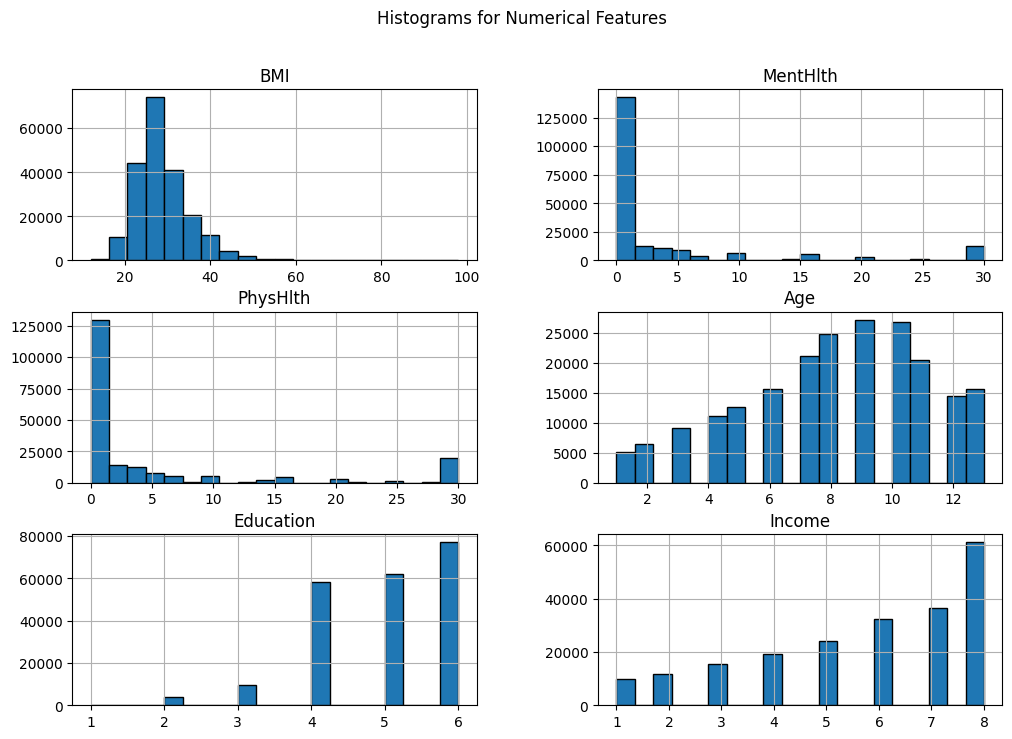

In [ ]:
# Plot distributions for numerical features

numerical_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

df[numerical_features].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms for Numerical Features')
plt.show()

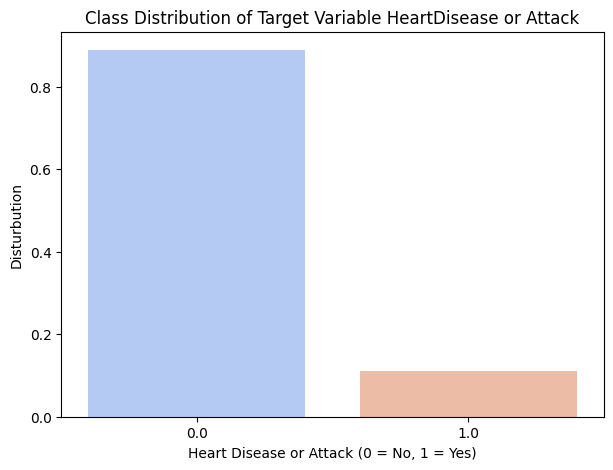

HeartDiseaseorAttack
0.0    0.889279
1.0    0.110721
Name: proportion, dtype: float64


In [ ]:
# checking for imbalance in target variable

target = df["HeartDiseaseorAttack"].value_counts(normalize=True)

# plot the disturbution

plt.figure(figsize=(7, 5))
sns.barplot(x=target.index, y=target.values, palette="coolwarm")
plt.title("Class Distribution of Target Variable HeartDisease or Attack")
plt.xlabel("Heart Disease or Attack (0 = No, 1 = Yes)")
plt.ylabel("Disturbution")
plt.show()

# Display Disturbution values
print(target)






# Including multi-variate analysis to determine the correlations and analysis of target variables.

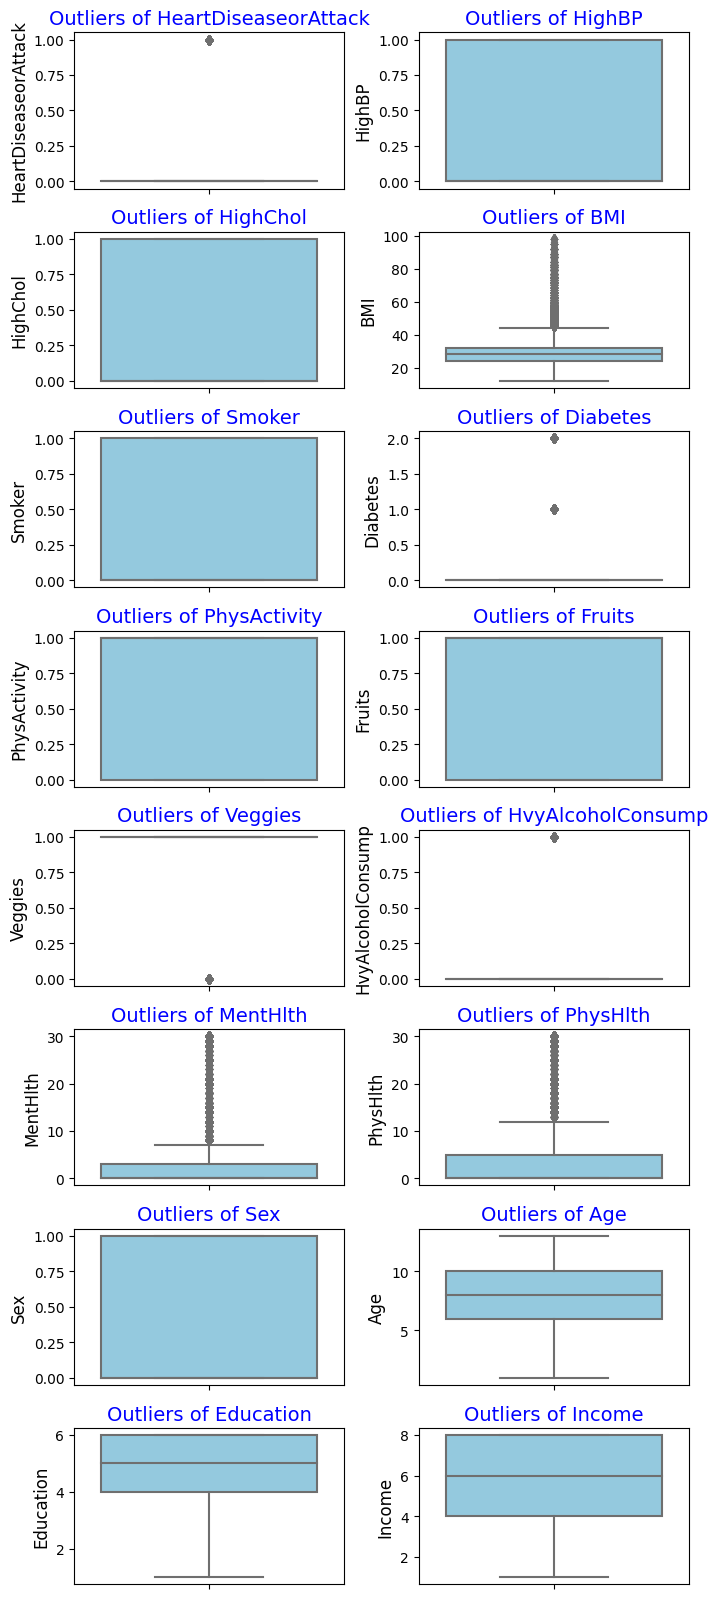

In [ ]:
# outliers for each feature

plt.figure(figsize=(7, len(df.columns) * 2))

for i, column in enumerate(df.columns):
    plt.subplot(len(df.columns), 2, i + 1)
    sns.boxplot(data=df, y=column, color='skyblue')
    plt.title(f'Outliers of {column}', fontsize=14, color='blue')
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()


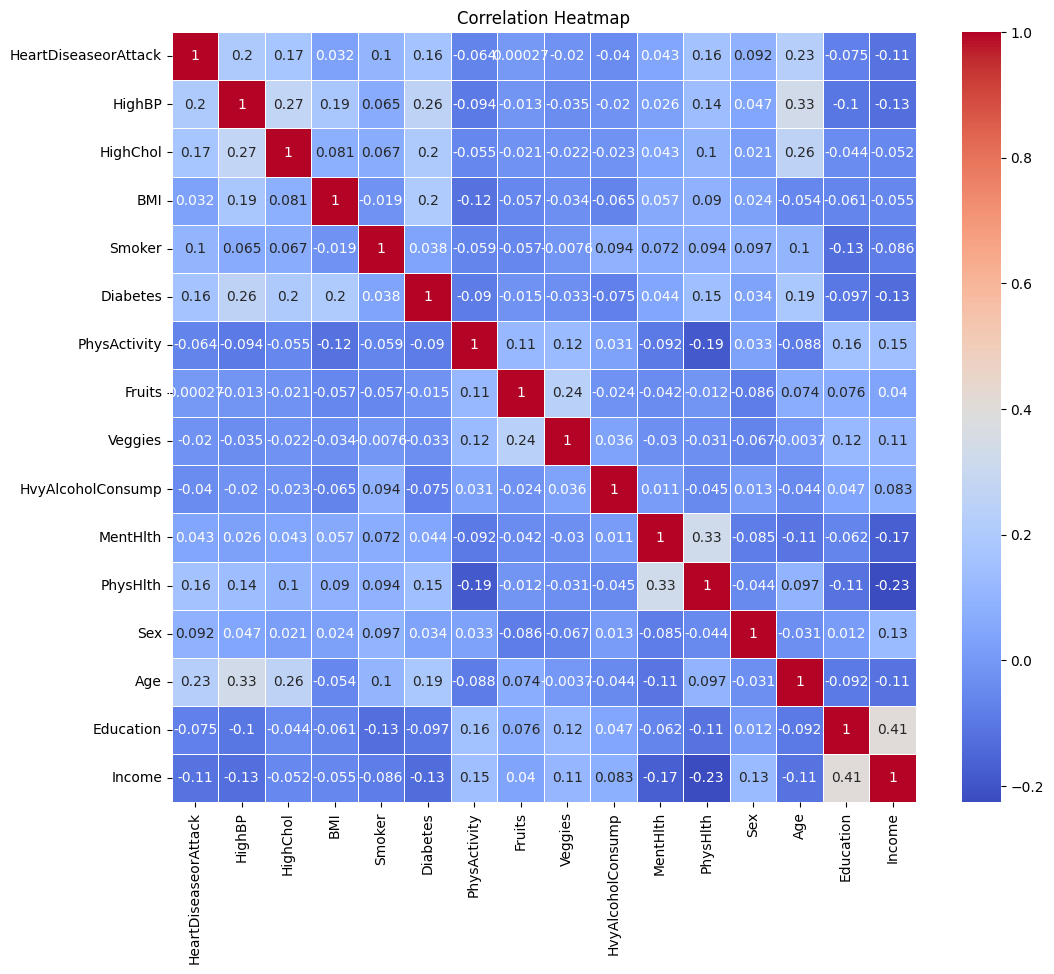

In [ ]:
# Correlation heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

# To determine if new features can be created, based on the given data

In [ ]:
df['Lifestyle'] = df['Fruits'] + df['Veggies'] - df['HvyAlcoholConsump']


In [ ]:
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income,Lifestyle
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0,1.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0,1.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,2.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0,2.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0,0.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,2.0


# Making Features and Target

In [ ]:
# Defining target and features

x = df.drop(columns=['HeartDiseaseorAttack', 'Fruits', 'Veggies', 'Sex', 'Education', 'Income', 'HvyAlcoholConsump', 'PhysActivity' ])
y = df['HeartDiseaseorAttack']


In [ ]:
x.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Diabetes', 'MentHlth',
       'PhysHlth', 'Age', 'Lifestyle'],
      dtype='object')

# Dividing Data for Training and Testing

In [ ]:
# using train test split for dividng data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [ ]:
x_train.shape

(168662, 9)

In [ ]:
x_test.shape

(42166, 9)

In [ ]:
y_train.shape

(168662,)

In [ ]:
y_test.shape

(42166,)

# Using techniques such as oversampling, undersampling to handle class imbalance.

In [ ]:
#Create SMOTE
smote = SMOTE(random_state=30)

# Apply SMOTE to training data
X_resample, Y_resample = smote.fit_resample(x_train, y_train)


In [ ]:
Y_resample.value_counts()

HeartDiseaseorAttack
0.0    149988
1.0    149988
Name: count, dtype: int64

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

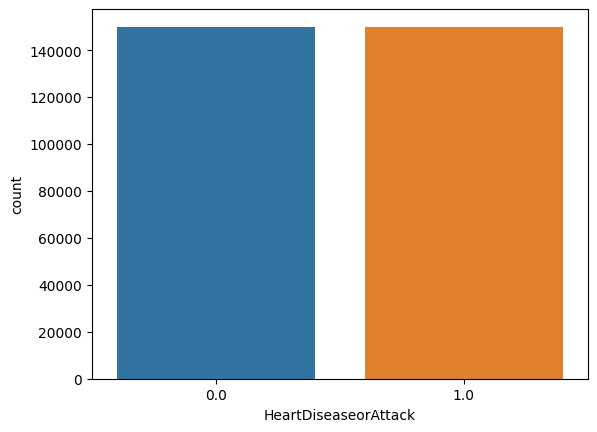

In [ ]:
sns.countplot(x = Y_resample)

# Binary classification Expermentation determine the list of models you would like to experiment

LinearDiscriminantAnalysis ,   
AdaBoostClassifier,  
RandomForestClassifier,  
CalibratedClassifierCV,  
LogisticRegression,  
LGBMClassifier,  
SGDClassifier

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from lightgbm import LGBMClassifier

In [ ]:
models = {

    'LDA': LinearDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'RandomForest': RandomForestClassifier(),
    'CalibratedCV': CalibratedClassifierCV(),
    'LogisticRegression': LogisticRegression(),
    'LGBM': LGBMClassifier(),
    'SGD': SGDClassifier()
}

In [ ]:
# Training all the models
for model,clf in models.items():
    clf.fit(X_resample, Y_resample)
    print(f'{model} sucessfully trained')


LDA sucessfully trained
AdaBoost sucessfully trained
RandomForest sucessfully trained
CalibratedCV sucessfully trained
LogisticRegression sucessfully trained
LGBM sucessfully trained
SGD sucessfully trained


In [ ]:
model_predictions = {}

# Training each model and making predictions
for model_name, model in models.items():
    print(f"Testing with {model_name}...")

    # Making predictions on the test data with each model
    predictions = model.predict(x_test)

    # Storing predictions in the dictionary of every model
    model_predictions[model_name] = predictions

Testing with LDA...
Testing with AdaBoost...
Testing with RandomForest...
Testing with CalibratedCV...
Testing with LogisticRegression...
Testing with LGBM...
Testing with SGD...


In [ ]:
# 0 means NO
# 1 means YES

model_predictions

{'LDA': array([0., 0., 0., ..., 1., 0., 1.]),
 'AdaBoost': array([0., 0., 0., ..., 1., 0., 1.]),
 'RandomForest': array([0., 0., 0., ..., 0., 0., 1.]),
 'CalibratedCV': array([0., 0., 0., ..., 1., 0., 1.]),
 'LogisticRegression': array([0., 0., 0., ..., 1., 0., 1.]),
 'LGBM': array([0., 0., 0., ..., 0., 0., 1.]),
 'SGD': array([0., 0., 0., ..., 1., 1., 1.])}

In [ ]:
# Accuracy, Precision, Recall, F1 score for all the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
for model, clf in models.items():
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model} Accuracy: {accuracy:.2f}')
    precision = precision_score(y_test, y_pred)
    print(f'{model} precision: {precision:.2f}')
    recall = recall_score(y_test, y_pred)
    print(f'{model} recall: {recall:.2f}')
    f1 = f1_score(y_test, y_pred)
    print(f'{model} f1_score: {f1:.2f}')


LDA Accuracy: 0.69
LDA precision: 0.23
LDA recall: 0.77
LDA f1_score: 0.35
AdaBoost Accuracy: 0.79
AdaBoost precision: 0.28
AdaBoost recall: 0.55
AdaBoost f1_score: 0.37
RandomForest Accuracy: 0.83
RandomForest precision: 0.24
RandomForest recall: 0.23
RandomForest f1_score: 0.24
CalibratedCV Accuracy: 0.68
CalibratedCV precision: 0.22
CalibratedCV recall: 0.75
CalibratedCV f1_score: 0.34
LogisticRegression Accuracy: 0.70
LogisticRegression precision: 0.23
LogisticRegression recall: 0.75
LogisticRegression f1_score: 0.36
LGBM Accuracy: 0.84
LGBM precision: 0.30
LGBM recall: 0.30
LGBM f1_score: 0.30
SGD Accuracy: 0.53
SGD precision: 0.18
SGD recall: 0.90
SGD f1_score: 0.30


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

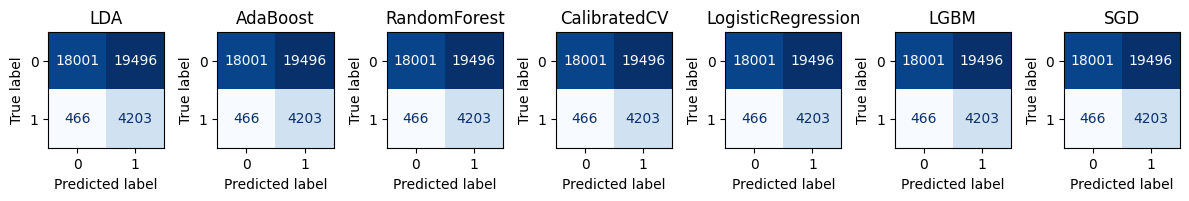

In [ ]:
models = {

    'LDA': LinearDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'RandomForest': RandomForestClassifier(),
    'CalibratedCV': CalibratedClassifierCV(),
    'LogisticRegression': LogisticRegression(),
    'LGBM': LGBMClassifier(),
    'SGD': SGDClassifier()

}
# plotting CM for all the models
fig, axes = plt.subplots(1, len(models), figsize=(12, 14))

for ax, (model_name, predictions) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    ax.set_title(model_name)

plt.tight_layout()
plt.show()

# Plotting AUC and ROC curves

In [ ]:
from sklearn.metrics import roc_curve, auc

<IPython.core.display.Javascript object>

Completed training with Random Forest
Completed training with Gradient Boosting
Completed training with Logistic Regression


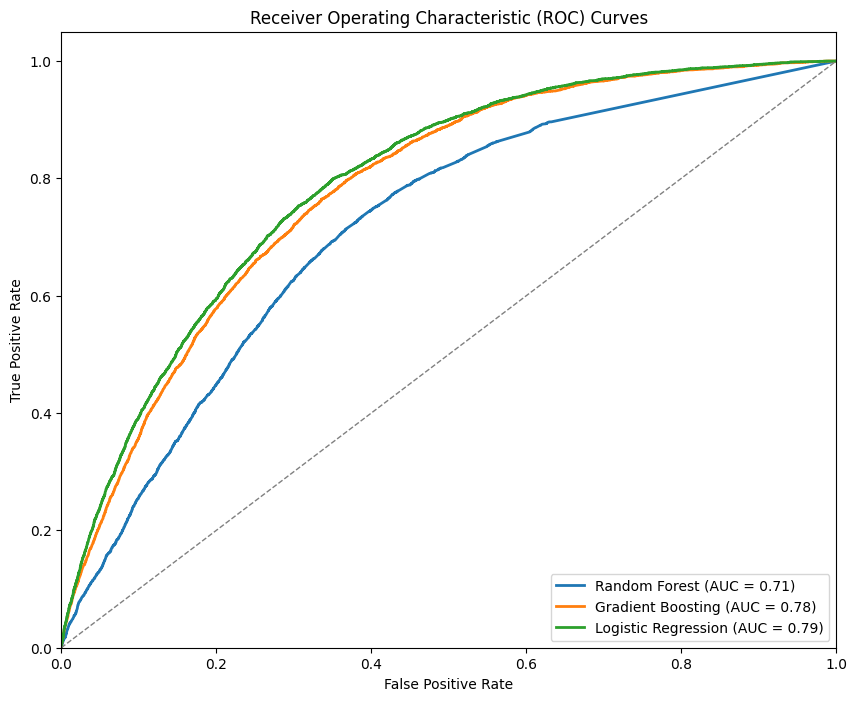

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Fit models for training
for name, model in models.items():
    model.fit(X_resample, Y_resample)
    print(f'Completed training with {name}')

# Ploting ROC curves for all models
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_proba = model.predict_proba(x_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot each ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
